In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import sys
sys.path.append("..")
from SlidingWindow import *

In [4]:
def get_data(countrycode):

    data = pd.read_csv('COVIDDATA.csv')
    data = data.to_numpy()
    
    notC = True
    startindex = 0
    while notC:
        if data[startindex,1] == countrycode:
            notC = False
        else:
            startindex += 1
            
    isC = True
    endindex = startindex
    while isC:
        if data[endindex,1] == countrycode:
            endindex += 1
        else:
            isC = False
    
    return data[startindex:endindex]

def get_info(Data):
    cases = (Data[:,4]).astype(int)
    cases = make_positive(cases)
    deaths = (Data[:,6]).astype(int)
    deaths = make_positive(deaths)
    return cases, deaths

def make_positive(Data):
    for i in range(len(Data)):
        if Data[i] < 0:
            Data[i] *= -1
    return Data

def get_interp(USC,USD,ITC,ITD,DAF):
    IUSC = interp_data(USC,DAF)
    IUSD = interp_data(USD,DAF)
    IITC = interp_data(ITC,DAF)
    IITD = interp_data(ITD,DAF)
    return IUSC,IUSD,IITC,IITD

def interp_data(Data, DAF):
    #Interpolate Time Series to new size
    fac = len(DAF)/len(Data)
    N = len(Data)
    x = np.linspace(0, 1, N)
    f = interpolate.interp1d(x,Data,kind='cubic')
    xnew = np.linspace(0, 1, int(fac*N))
    return f(xnew)

def create_2D_shape(Cases,Deaths):
    s = len(Cases)
    Shape = np.zeros((s,2))
    Shape[:,0] = Cases[:]
    Shape[:,1] = Deaths[:]
    return Shape

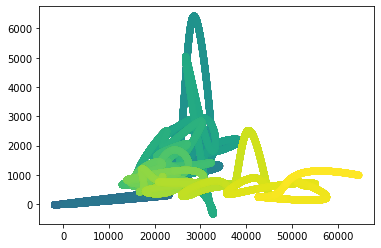

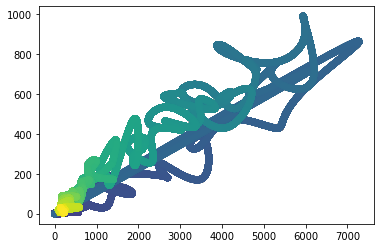

In [5]:
#covid data from january 20th to july 10th 2020
UScode = "US"
ITcode = "IT"
USData = get_data(UScode)
ITData = get_data(ITcode)

USC,USD = get_info(USData)
ITC,ITD = get_info(ITData)

fs = 44100
seconds = 10
DesiredAudioFrame = np.linspace(0, 1, int(fs*seconds))

IUSC,IUSD,IITC,IITD = get_interp(USC,USD,ITC,ITD,DesiredAudioFrame)

USShape = create_2D_shape(IUSC,IUSD)
ITShape = create_2D_shape(IITC,IITD)

plt.scatter(USShape[:, 0], USShape[:, 1], c = DesiredAudioFrame)
plt.show()
plt.figure()
plt.scatter(ITShape[:, 0], ITShape[:, 1], c = DesiredAudioFrame)
plt.show()

In [ ]:
plt.figure(figsize=(16, 16))
plt.subplot(411)
plt.plot(USC)
plt.ylabel("Cases Per Day")
plt.xlabel("Days")
plt.title("New Cases")
plt.subplot(412)
plt.plot(IUSC)
plt.ylabel("Cases Per Day")
plt.xlabel("Days")
plt.title("New Cases")
plt.subplot(413)
plt.plot(USD)
plt.ylabel("Deaths Per Day")
plt.xlabel("Days")
plt.title("New Deaths")
plt.subplot(414)
plt.plot(IUSD)
plt.ylabel("Deaths Per Day")
plt.xlabel("Days")
plt.title("New Deaths")
plt.tight_layout()

plt.figure(figsize=(16, 16))
plt.subplot(411)
plt.plot(ITC)
plt.ylabel("Cases Per Day")
plt.xlabel("Days")
plt.title("New Cases")
plt.subplot(412)
plt.plot(IITC)
plt.ylabel("Cases Per Day")
plt.xlabel("Days")
plt.title("New Cases")
plt.subplot(413)
plt.plot(ITD)
plt.ylabel("Deaths Per Day")
plt.xlabel("Days")
plt.title("New Deaths")
plt.subplot(414)
plt.plot(IITD)
plt.ylabel("Deaths Per Day")
plt.xlabel("Days")
plt.title("New Deaths")
plt.tight_layout()